Plotting functions for comparing survival and recovery of single biological groups across various scenarios from the Salish Sea Atlantis Model

In [38]:
import os
import xarray as xr
import numpy as np
import geopandas as gpd
import math
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

## Define scenario and control files

In [3]:
# Read in salish sea atlantis output files.
control_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019_02_control/outputSalishSea.nc"
scenario1_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019_02/outputSalishSea.nc"
scenario2_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019-2023_02/outputSalishSea.nc"
scenario3_file = "/ocean/rlovindeer/MOAD/analysis-raisha/SSmodel_outputs/Scrubber_discharge_2019-2029_02/outputSalishSea.nc"

control = xr.open_dataset(str(control_file), decode_cf=True)
scenario1 = xr.open_dataset(str(scenario1_file), decode_cf=True)
scenario2 = xr.open_dataset(str(scenario2_file), decode_cf=True)
scenario3 = xr.open_dataset(str(scenario3_file), decode_cf=True)

t = np.ma.filled(scenario1.variables['t'], np.nan)

# start and end time of data display, after burn-in
start = 101
end = t.size-1

time = t[start:end]

spill_start = np.datetime64('2019-01-01')
spill_end = np.datetime64('2019-12-31')


In [4]:
start = 112
end = 124

time = t[start:end]

spill_start = np.datetime64('2020-08-01')
spill_end = np.datetime64('2019-12-31')

## Dictionary of ecological groups

aged_groups = {
    'sharks','birds','mammals','fish','salmon'
}

pelagic_groups = {
    'plankton','bacteria','sharks','birds','mammals','named_fish','salmon','fish','benth_feeders'
}

benthic_groups = {
    'benthos','shellfish'
}

In [1]:
cohorts = {
    'Benthopelagic':10, 'Small_Demersal_fish':10, 'Small_Flatfish':10, 'Small_pelagic_fish':7,
    'Chinook_salmon':5, 'Chum_salmon':5, 'Coho_salmon':5,'Pink_salmon':5, 'Sockeye_salmon':5, 
    'Other_salmonids':8,'Hatchery_Chinook_salmon':3,'Hatchery_Coho_salmon':3,'Hatchery_Sockeye_salmon':3,
    'Dogfish':10,'Ratfish':10,'Rockfish':10,'Sixgill':10,'Hake':10,
    'Harbor_porpoise':10, 'Harbor_seals':10,'Humpback_whales':10,
    'Large_Demersal_fish':10, 'Large_Flatfish' :10,'Lingcod' :10,
    'Orcas_resident':10, 'Orcas_transient':10,
    'Pacific_herring':10,'Pollock':10,'Sandlance':7, 
    'Seabird_gulls':10, 'Seabirds':10,'Sealions':10,'Skates':10,
}

sharks = {
    'dogfish':'Dogfish','ratfish':'Ratfish', 'sixgill':'Sixgill', 'skates':'Skates',
}

birds = {
    'seagulls':'Seabird_gulls', 'other seabirds':'Seabirds',
}

mammals = {
    'porpoises':'Harbor_porpoise', 'seals':'Harbor_seals', 'humpbacks':'Humpback_whales','sealions':'Sealions',
    'resident orcas':'Orcas_resident', 'transient orcas':'Orcas_transient',
}
    
fish = {
    'benthopelagic':'Benthopelagic', 'small pelagic':'Small_pelagic_fish', 'small demersal':'Small_Demersal_fish', 
    'large demersal':'Large_Demersal_fish', 'small flatfish':'Small_Flatfish', 'large flatfish':'Large_Flatfish',
}

named_fish = {
    'hake':'Hake','lingcod':'Lingcod', 'pollock':'Pollock', 'sandlance':'Sandlance', 
    'rockfish':'Rockfish', 'pacific herring':'Pacific_herring',
}

salmon = {
    'Chinook':'Chinook_salmon', 'Chum':'Chum_salmon', 'Coho':'Coho_salmon','Pink':'Pink_salmon', 'Sockeye':'Sockeye_salmon', 
    'Hatchery Chinook':'Hatchery_Chinook_salmon','Hatchery Coho':'Hatchery_Coho_salmon','Hatchery Sockeye':'Hatchery_Sockeye_salmon', 
    'Other':'Other_salmonids'
}

benthos = {
    'benthic grazers':'Benthic_grazer', 'filter feeders': 'Filter_feeder', 'macrobenthos':'Macrobenthos',  
    'macroalgae':'Macroalgae', 'seagrass':'Seagrass', 'sponges':'Sponges', 
}

benth_feeders = { #pelagic, i.e. have > 1 depth level
    'benthic carnivores':'Benthic_Carniv', 'deposit feeders':'Deposit_Feeder', 'meiobenthos':'Meiobenth',
}
    
shellfish = {
    'bivalves':'Bivalves', 'crabs':'Crabs', 'dungeness crabs':'Dungeness_crabs',
}

plankton = {
    'carnivorous zooplankton':'Carniv_Zoo', 'gelatinous zooplantkon':'Gelat_Zoo', 'microzooplankton':'MicroZoo',
    'mesozooplankton':'Zoo', 'diatoms':'Diatom', 'picophytoplankton':'PicoPhytopl', 'squid':'Squid', 'prawn': 'Prawn',
}

bacteria = {
    'labile detritus':'Lab_Det', 'refractory detritus':'Ref_Det', 
    'pelagic bacteria':'Pelag_Bact','sedimentary bacteria': 'Sed_Bact'
}

## Group plotting functions

- plot_benthos(group)
- plot_pelagic(group)
- plot_cohorts(group)

In [176]:
def plot_benthic(group): # benthos, shellfish

    # Plot variables
    label_size = 11
    font_size = 12
    line_width = 2
    y_min = 0.8
    y_max = 1.2

    # fig, ax = plt.subplots(figsize = (14,3))
    # ax.tick_params(labelsize=label_size)
    # ax.set_ylabel('scenario:control')
    # ax.set_title('Biomass of benthic groups across all boxes in Salish Sea Atlantis', fontsize = font_size)
    #ax.set_ylim([0.8, 1.2])
    # ax = plt.GridSpec(3, 3, wspace=0.2, hspace=0.2, width_ratios=[1, 1, 1], height_ratios=[1, 1, 1],)

    for species in group:
        benthic_oiled1 = np.ma.filled(scenario1.variables[group[species] + '_N'][start:end,:], np.nan) # tonnes
        benthic_oiled2 = np.ma.filled(scenario2.variables[group[species] + '_N'][start:end,:], np.nan) # tonnes
        benthic_oiled3 = np.ma.filled(scenario3.variables[group[species] + '_N'][start:end,:], np.nan) # tonnes
        benthic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:], np.nan)
        ratio1 = benthic_oiled1.sum(axis=1) / benthic_control.sum(axis=1) 
        ratio2 = benthic_oiled2.sum(axis=1) / benthic_control.sum(axis=1) 
        ratio3 = benthic_oiled3.sum(axis=1) / benthic_control.sum(axis=1) 
        control_ratio = benthic_control.sum(axis=1)  / benthic_control.sum(axis=1)
        fig, ax = plt.subplots()
        ax.plot(time, control_ratio, 'k', time, ratio1, time, ratio2, time, ratio3, linewidth = 2)
        ax.legend(['control', 'scenario 1', 'scenario 2', 'scenario 3'])
        ax.set_title(species)
        ax.plot(spill_start, 1, 'ro', alpha=0.5)
        ax.set_ylim([y_min, y_max])
        # ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [175]:
def plot_benthic_box(group, box_number): # benthos, shellfish

    # Plot variables
    label_size = 11
    font_size = 12
    line_width = 2
    y_min = 0.8
    y_max = 1.2

    for species in group:
        benthic_oiled1 = np.ma.filled(scenario1.variables[group[species] + '_N'][start:end,box_number], np.nan) # tonnes
        benthic_oiled2 = np.ma.filled(scenario2.variables[group[species] + '_N'][start:end,box_number], np.nan) # tonnes
        benthic_oiled3 = np.ma.filled(scenario3.variables[group[species] + '_N'][start:end,box_number], np.nan) # tonnes
        benthic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number], np.nan)
        ratio1 = benthic_oiled1 / benthic_control 
        ratio2 = benthic_oiled2 / benthic_control 
        ratio3 = benthic_oiled3 / benthic_control
        control_ratio = benthic_control / benthic_control
        fig, ax = plt.subplots(sharex='all')
        ax.plot(time, control_ratio, 'k', time, ratio1, time, ratio2, time, ratio3, linewidth = 2)
        ax.legend(['control', 'scenario 1', 'scenario 2', 'scenario 3'])
        ax.set_title(species)
        ax.set_ylim([y_min, y_max])
        ax.plot(spill_start, 1, 'ro', alpha=0.5)
        # ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [174]:
def plot_pelagic(group): #bacteria, plankton, sharks, birds, mammals, named_fish, salmon, fish, benth_feeders
    
    # Plot variables
    label_size = 11
    font_size = 12
    line_width = 2
    y_min = 0.8
    y_max = 1.2
    
    for species in group:
        pelagic_oiled1 = np.ma.filled(scenario1.variables[group[species] + '_N'][start:end,:,0:5], np.nan) # tonnes
        pelagic_oiled2 = np.ma.filled(scenario2.variables[group[species] + '_N'][start:end,:,0:5], np.nan) # tonnes
        pelagic_oiled3 = np.ma.filled(scenario3.variables[group[species] + '_N'][start:end,:,0:5], np.nan) # tonnes
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,0:5], np.nan)
        # sum across depth
        pelagic_oiled1 = pelagic_oiled1.sum(axis=2) 
        pelagic_oiled2 = pelagic_oiled2.sum(axis=2) 
        pelagic_oiled3 = pelagic_oiled3.sum(axis=2) 
        pelagic_control = pelagic_control.sum(axis=2)
        # sum across boxes
        ratio1 = pelagic_oiled1.sum(axis=1) / pelagic_control.sum(axis=1) 
        ratio2 = pelagic_oiled2.sum(axis=1) / pelagic_control.sum(axis=1) 
        ratio3 = pelagic_oiled3.sum(axis=1) / pelagic_control.sum(axis=1) 
        control_ratio = pelagic_control.sum(axis=1) / pelagic_control.sum(axis=1)

        fig, ax = plt.subplots(sharex='all')
        ax.plot(time, control_ratio, 'k', time, ratio1, time, ratio2, time, ratio3, linewidth = 2)
        ax.legend(['control', 'scenario 1', 'scenario 2', 'scenario 3'])
        ax.set_title(species)
        ax.plot(spill_start, 1, 'ro', alpha=0.5)
        ax.set_ylim([y_min, y_max])
        # ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
        
    return fig, ax

In [169]:
def plot_pelagic_test(group): #bacteria, plankton, sharks, birds, mammals, named_fish, salmon, fish, benth_feeders
    
    # Plot variables
    label_size = 11
    font_size = 12
    line_width = 2
    y_min = 0.8
    y_max = 1.2
    
    # cols = 3
    # rows = math.ceil(len(group) / cols)

    # fig = plt.figure(figsize=(18, 9), facecolor='white')
    # ax.set_ylim([y_min, y_max])

    cols = 3
    rows = math.ceil(len(group) / cols)
    fig, ax = plt.subplots(rows, cols, figsize=(18,12))
    
    for i in range(rows):
        for species in group:

                pelagic_oiled1 = np.ma.filled(scenario1.variables[group[species] + '_N'][start:end,:,0:5], np.nan) # tonnes
                pelagic_oiled2 = np.ma.filled(scenario2.variables[group[species] + '_N'][start:end,:,0:5], np.nan) # tonnes
                pelagic_oiled3 = np.ma.filled(scenario3.variables[group[species] + '_N'][start:end,:,0:5], np.nan) # tonnes
                pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,:,0:5], np.nan)
                # sum across depth
                pelagic_oiled1 = pelagic_oiled1.sum(axis=2) 
                pelagic_oiled2 = pelagic_oiled2.sum(axis=2) 
                pelagic_oiled3 = pelagic_oiled3.sum(axis=2) 
                pelagic_control = pelagic_control.sum(axis=2)
                # sum across boxes
                ratio1 = pelagic_oiled1.sum(axis=1) / pelagic_control.sum(axis=1) 
                ratio2 = pelagic_oiled2.sum(axis=1) / pelagic_control.sum(axis=1) 
                ratio3 = pelagic_oiled3.sum(axis=1) / pelagic_control.sum(axis=1) 
                control_ratio = pelagic_control.sum(axis=1) / pelagic_control.sum(axis=1)

                axes[i][list(group).index(species)].plot(time, control_ratio, 'k', time, ratio1, time, ratio2, time, ratio3, linewidth = 2)
                axes[i][[list(group).index(species)]].set_title(species)
                axes[i][[list(group).index(species)]].set_ylabel('scenario:control')
                axes[i][[list(group).index(species)]].plot(spill_start, 1, 'ro', alpha=0.5)
                axes[i][[list(group).index(species)]].legend(['control', 'scenario 1', 'scenario 2', 'scenario 3'])
        
    return fig, axes

In [173]:
def plot_pelagic_box(group, box_number): #bacteria, plankton, sharks, birds, mammals, named_fish, salmon, fish, benth_feeders 
    
    # Plot variables
    label_size = 11
    font_size = 12
    line_width = 2
    y_min = 0.8
    y_max = 1.2

    for species in group:
        pelagic_oiled1 = np.ma.filled(scenario1.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan) # tonnes
        pelagic_oiled2 = np.ma.filled(scenario2.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan) # tonnes
        pelagic_oiled3 = np.ma.filled(scenario3.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan) # tonnes
        pelagic_control = np.ma.filled(control.variables[group[species] + '_N'][start:end,box_number,0:5], np.nan)
        ratio1 = pelagic_oiled1.sum(axis=1) / pelagic_control.sum(axis=1) 
        ratio2 = pelagic_oiled2.sum(axis=1) / pelagic_control.sum(axis=1) 
        ratio3 = pelagic_oiled3.sum(axis=1) / pelagic_control.sum(axis=1) 
        control_ratio = pelagic_control.sum(axis=1) / pelagic_control.sum(axis=1)
        fig, ax = plt.subplots()
        ax.plot(time, control_ratio, 'k', time, ratio1, time, ratio2, time, ratio3, linewidth = 2)
        ax.legend(['control', 'scenario 1', 'scenario 2', 'scenario 3'])
        ax.set_title(species)
        ax.plot(spill_start, 1, 'ro', alpha=0.5)
        ax.set_ylim([y_min, y_max])
        # ax.plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
    return fig, ax

In [163]:
def plot_cohorts(group, scenario):

    # Plot variables
    label_size = 11
    font_size = 12
    line_width = 2
    y_min = 0.5
    y_max = 1.5

    fig, ax = plt.subplots(3,1, figsize = (14,9), sharex='all')
    ax[0].set_title(group + ' Numbers', fontsize = font_size)
    ax[0].set_ylabel('scenario : control')
    ax[0].tick_params(labelsize=label_size)
    #ax[0].set_ylim([y_min, y_max])

    ax[1].set_title(group + ' Structural Nitrogen (bone size)', fontsize = font_size)
    ax[1].set_ylabel('scenario : control')
    ax[1].tick_params(labelsize=label_size)
    #ax[1].set_ylim([y_min, y_max])

    ax[2].set_title(group + ' Reserve Nitrogen (fatty tissue)', fontsize = font_size)
    ax[2].set_ylabel('scenario : control')
    ax[2].tick_params(labelsize=label_size)
    #ax[2].set_ylim([y_min, y_max])

    numCohorts = cohorts[group]
    cohort_names = []

    for cohort_num in range (1, numCohorts+1):

        new_species = group + str(cohort_num)
        cohort_names.append(cohort_num)
    
        o1_numbers = np.ma.filled(scenario.variables[new_species + '_Nums'][:,:,0:5], np.nan)
        o1_structuralN = np.ma.filled(scenario.variables[new_species +'_StructN'][:,:,0:5], np.nan)
        o1_reservedN = np.ma.filled(scenario.variables[new_species +'_ResN'][:,:,0:5], np.nan)

        c1_numbers = np.ma.filled(control.variables[new_species + '_Nums'][:,:,0:5], np.nan)
        c1_structuralN = np.ma.filled(control.variables[new_species +'_StructN'][:,:,0:5], np.nan)
        c1_reservedN = np.ma.filled(control.variables[new_species +'_ResN'][:,:,0:5], np.nan)

        o2_numbers = o1_numbers.sum(axis=2)
        o2_structuralN = o1_structuralN.sum(axis=2)
        o2_reservedN = o1_reservedN.sum(axis=2)

        c2_numbers = c1_numbers.sum(axis=2)
        c2_structuralN = c1_structuralN.sum(axis=2)
        c2_reservedN = c1_reservedN.sum(axis=2)

        numbers = o2_numbers.sum(axis=1) / c2_numbers.sum(axis=1)
        structuralN = o2_structuralN.sum(axis=1) / c2_structuralN.sum(axis=1)
        reservedN = o2_reservedN.sum(axis=1) / c2_reservedN.sum(axis=1)
        control_ratio = c2_reservedN.sum(axis=1) / c2_reservedN.sum(axis=1)

        ax[0].plot(time, numbers[start:end], linewidth = line_width)
        ax[1].plot(time, structuralN[start:end],linewidth = line_width)
        ax[2].plot(time, reservedN[start:end],linewidth = line_width)

    ax[0].legend(cohort_names, loc='center left')
    ax[0].plot(time, control_ratio[start:end], 'k',linewidth = 2)
    ax[0].plot(spill_start, 1, 'ro', alpha=0.5)
    #ax[0].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

    ax[1].plot(time, control_ratio[start:end], 'k',linewidth = 2)
    ax[1].plot(spill_start, 1, 'ro', alpha=0.5)
    #ax[1].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)
        
    ax[2].plot(time, control_ratio[start:end], 'k',linewidth = 2)
    ax[2].plot(spill_start, 1, 'ro', alpha=0.5)
    #ax[2].plot([spill_end, spill_end], [y_min, y_max], 'r',alpha=0.1)

    return fig, ax;
    

In [180]:
def plot_pelagic_pah(group, pah):

# Plot variables
    label_size = 11
    font_size = 12
    line_width = 2

    for species in group:
        pelagic_oiled1 = scenario1.variables[group[species] + '_' + pah][start:end,:,:]
        pelagic_oiled2 = scenario2.variables[group[species] + '_' + pah][start:end,:,:]
        pelagic_oiled3 = scenario3.variables[group[species] + '_' + pah][start:end,:,:]
        # sum over depth
        p_oiled1 = pelagic_oiled1.sum(axis=2)
        p_oiled2 = pelagic_oiled2.sum(axis=2)
        p_oiled3 = pelagic_oiled3.sum(axis=2)
        # sum over boxes
        p_oiled1 = pelagic_oiled1.sum(axis=1)
        p_oiled2 = pelagic_oiled2.sum(axis=1)
        p_oiled3 = pelagic_oiled3.sum(axis=1)
        fig, ax = plt.subplots()
        ax.plot(time, p_oiled1, time, p_oiled2, time, p_oiled3, linewidth = 2)
        ax.set_title(species)
        ax.set_ylabel('mgPAH')
        ax.plot(spill_start, 1, 'ro', alpha=0.5)
        ax.legend(['scenario 1', 'scenario 2', 'scenario 3'])
    return fig, ax

In [171]:
def plot_pelagic_pah_box(group, pah, box_number):

# Plot variables
    label_size = 11
    font_size = 12
    line_width = 2

    for species in group:
        pelagic_oiled1 = scenario1.variables[group[species] + '_' + pah][start:end,box_number,:]
        pelagic_oiled2 = scenario2.variables[group[species] + '_' + pah][start:end,box_number,:]
        pelagic_oiled3 = scenario3.variables[group[species] + '_' + pah][start:end,box_number,:]
        p_oiled1 = pelagic_oiled1.sum(axis=1)
        p_oiled2 = pelagic_oiled2.sum(axis=1)
        p_oiled3 = pelagic_oiled3.sum(axis=1)
        fig, ax = plt.subplots()
        ax.plot(time, p_oiled1, time, p_oiled2, time, p_oiled3, linewidth = 2)
        ax.set_title(species)
        ax.set_ylabel('mgPAH')
        ax.plot(spill_start, 1, 'ro', alpha=0.5)
        ax.legend(['scenario 1', 'scenario 2', 'scenario 3'])
    return fig, ax

## Plotting group ratios

### Across the whole model domain

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:title={'center':'skates'}>)

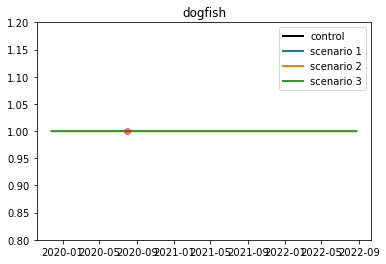

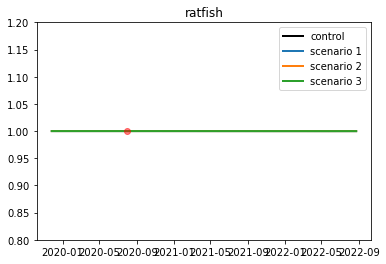

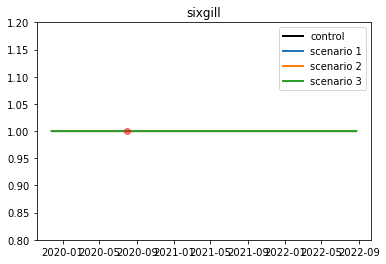

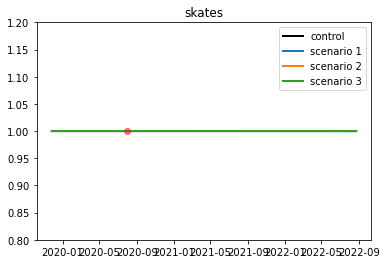

In [164]:
plot_pelagic(sharks)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'transient orcas'}>)

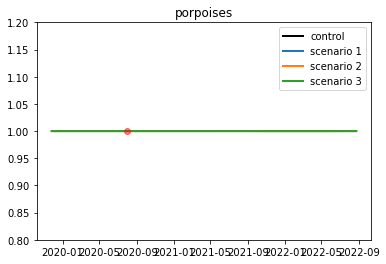

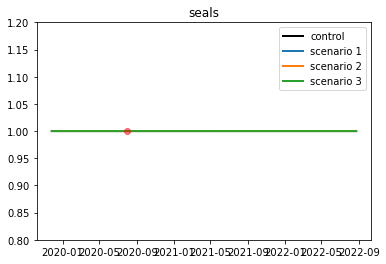

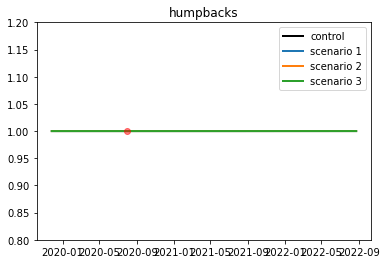

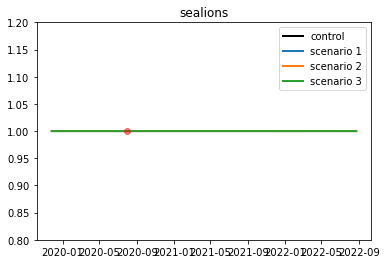

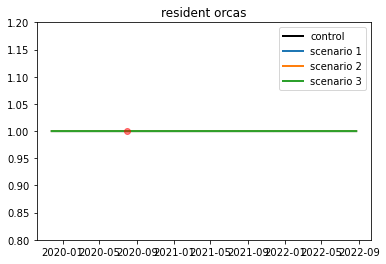

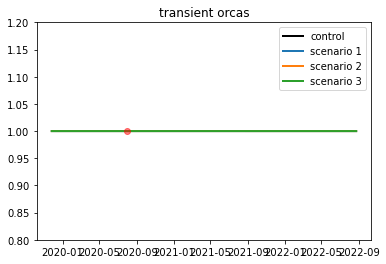

In [152]:
plot_pelagic(mammals)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'other seabirds'}>)

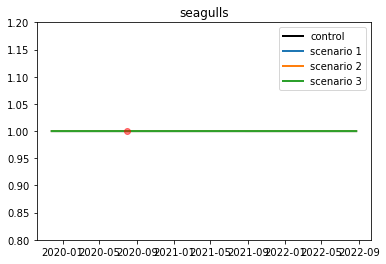

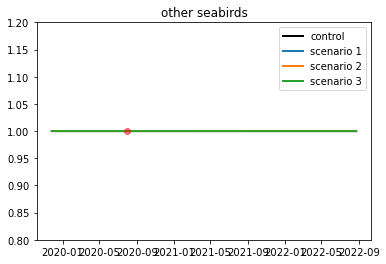

In [153]:
plot_pelagic(birds)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:title={'center':'Other'}>)

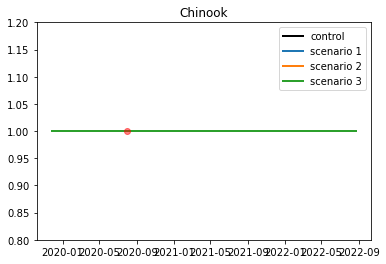

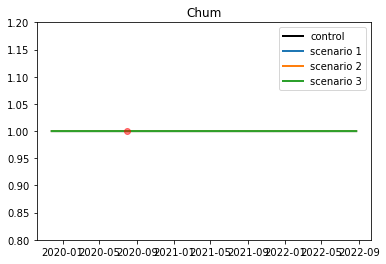

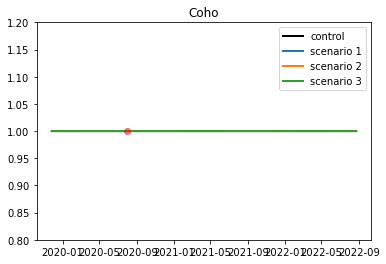

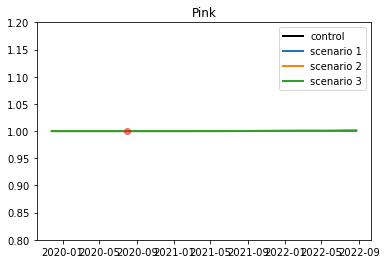

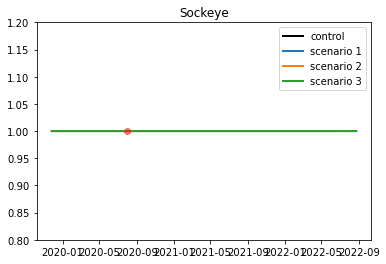

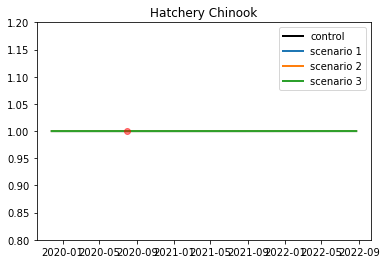

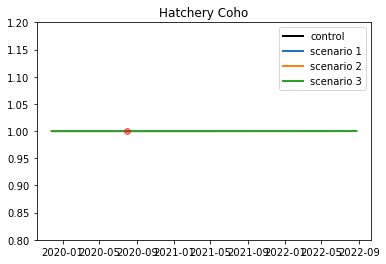

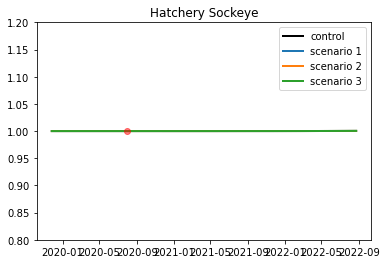

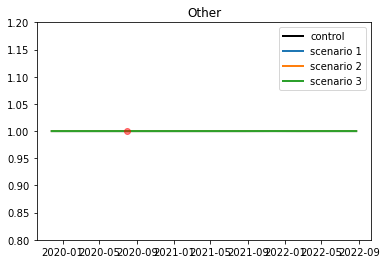

In [154]:
plot_pelagic(salmon)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'large flatfish'}>)

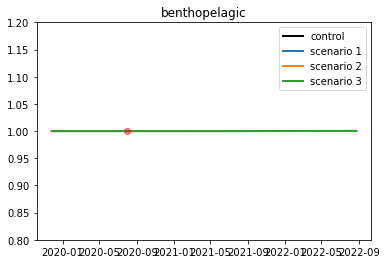

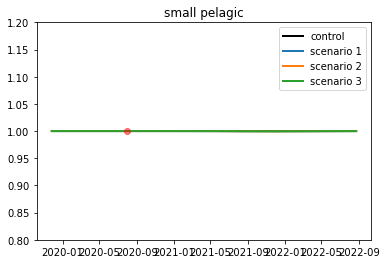

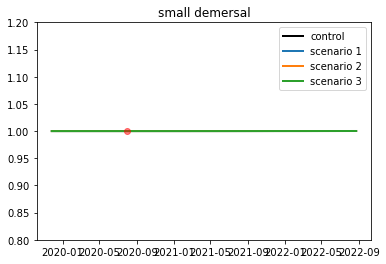

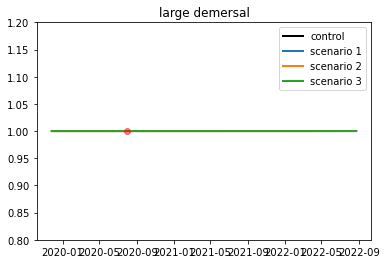

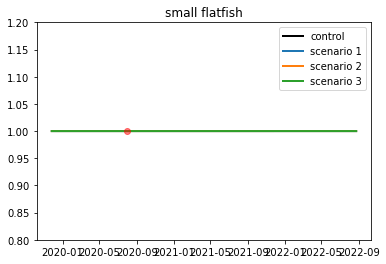

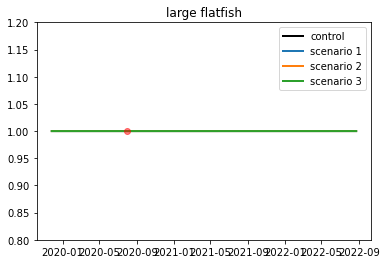

In [155]:
plot_pelagic(fish)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'pacific herring'}>)

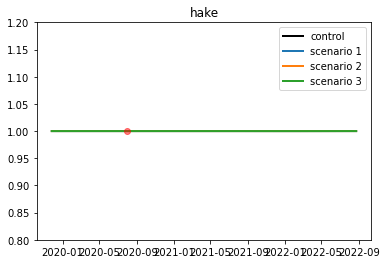

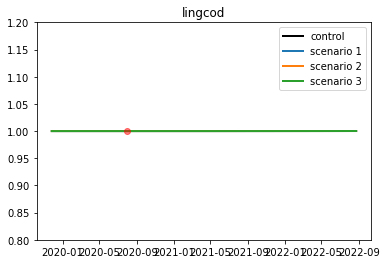

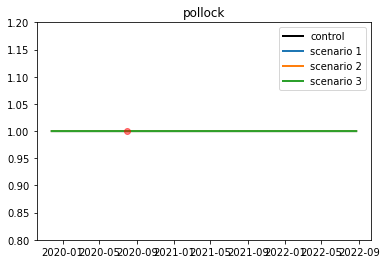

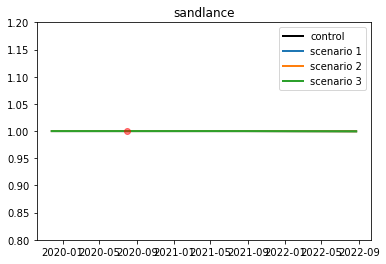

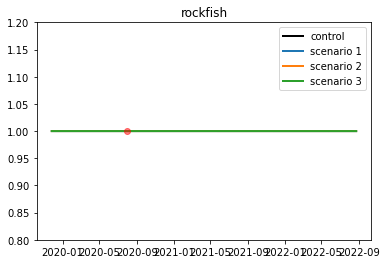

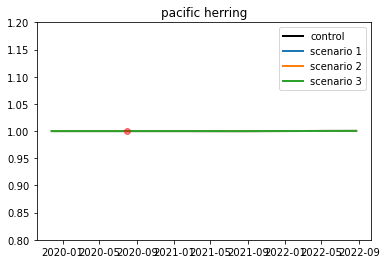

In [156]:
plot_pelagic(named_fish)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:title={'center':'prawn'}>)

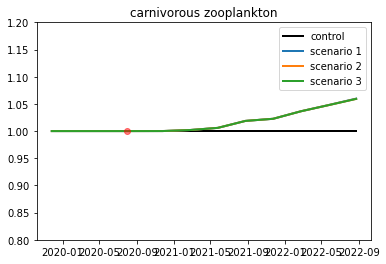

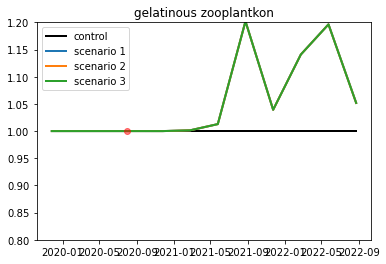

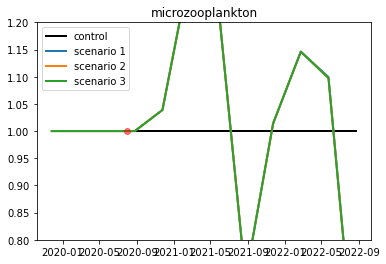

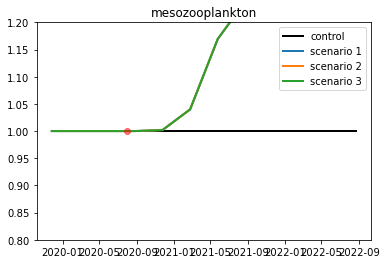

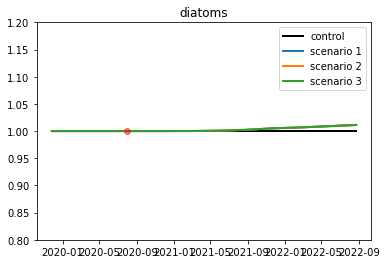

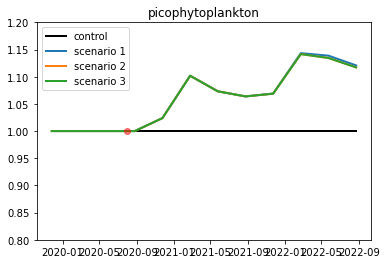

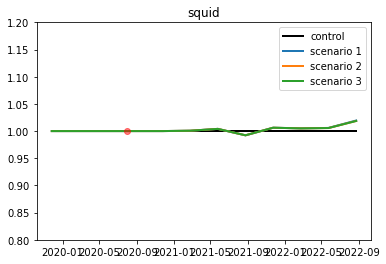

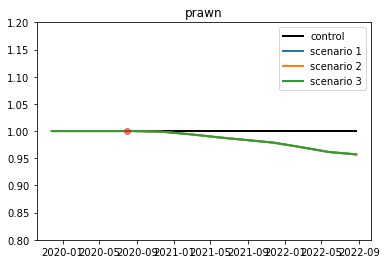

In [157]:
plot_pelagic(plankton)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'sedimentary bacteria'}>)

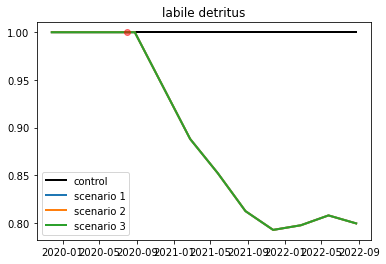

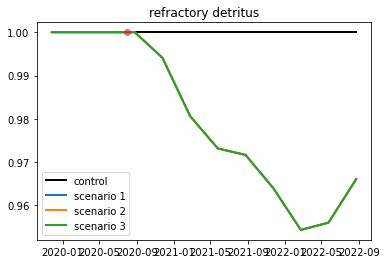

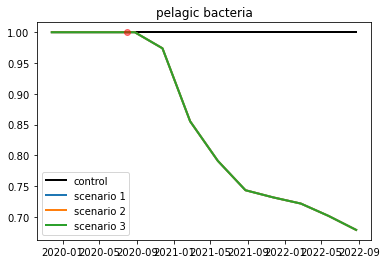

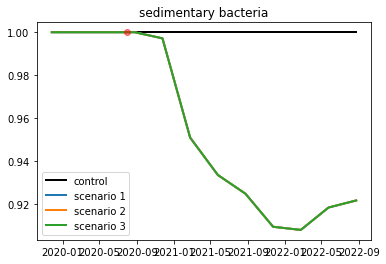

In [139]:
plot_pelagic(bacteria)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'meiobenthos'}>)

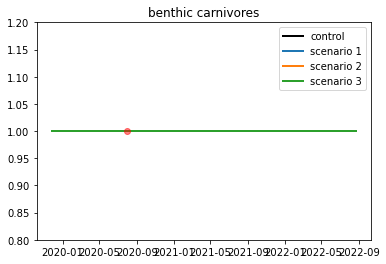

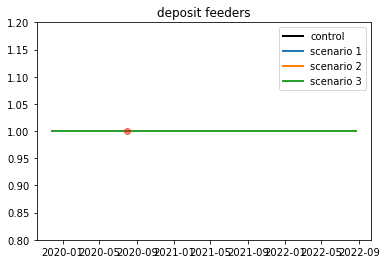

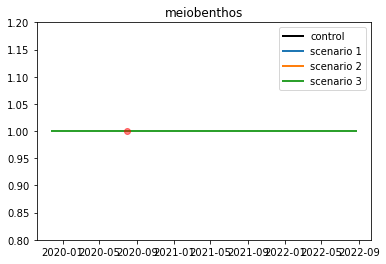

In [165]:
plot_pelagic(benth_feeders)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:title={'center':'sponges'}>)

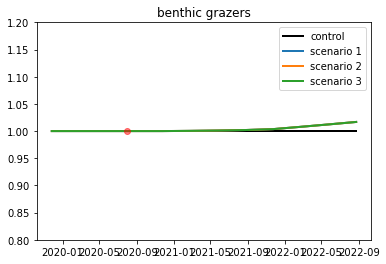

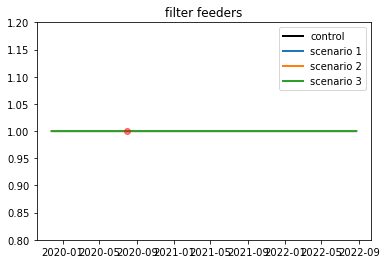

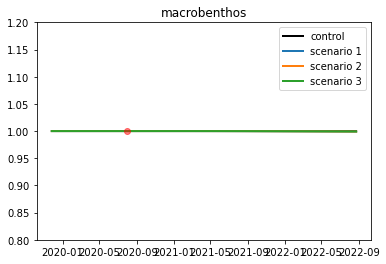

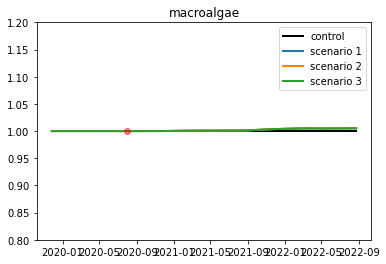

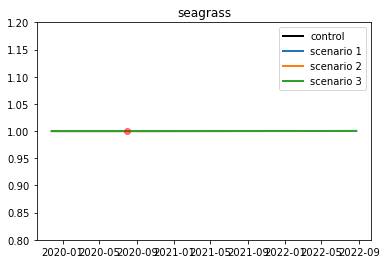

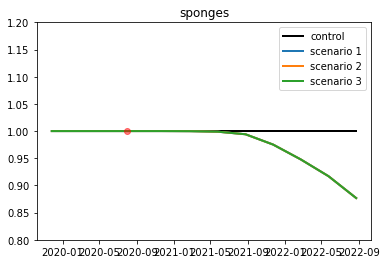

In [177]:
plot_benthic(benthos)

In [179]:
plot_pelagic_pah(plankton, 'Phenanthrene')

NameError: name 'box_number' is not defined

### Within individual boxes

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:title={'center':'prawn'}>)

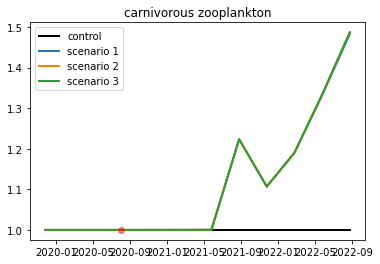

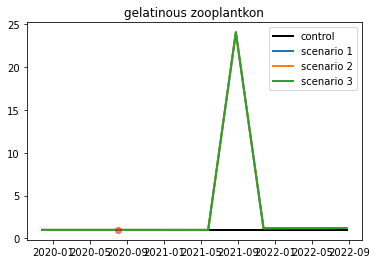

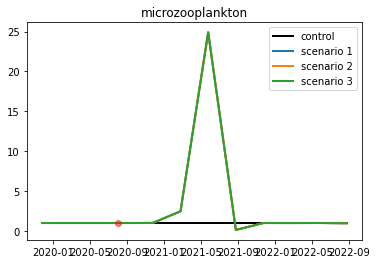

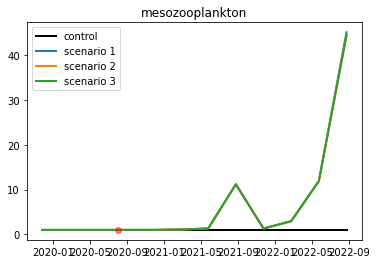

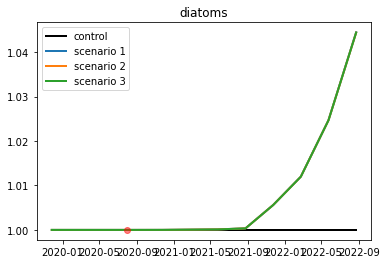

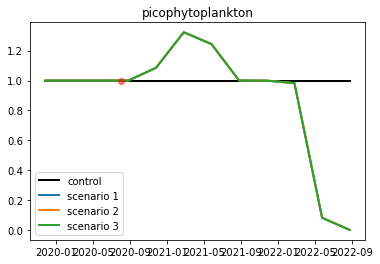

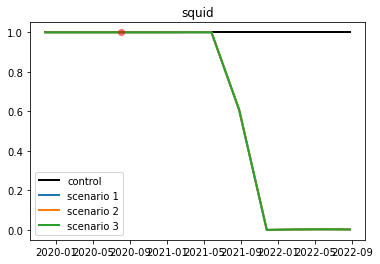

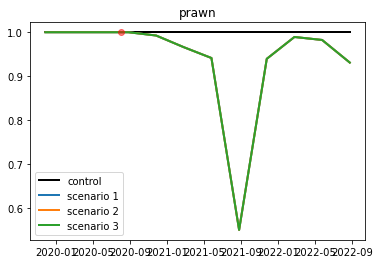

In [140]:
plot_pelagic_box(plankton, scenario1, 5)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'sedimentary bacteria'}>)

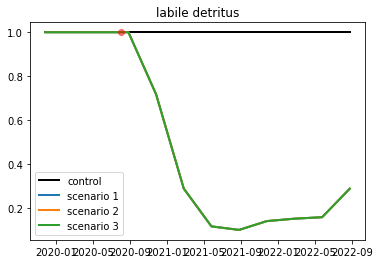

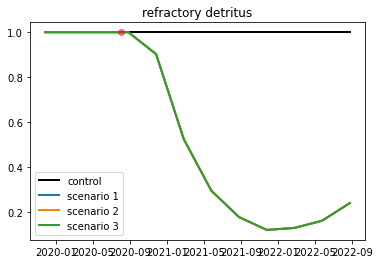

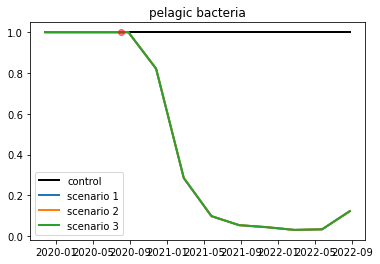

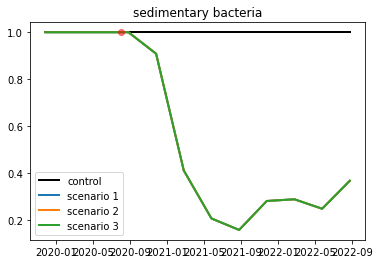

In [141]:
plot_pelagic_box(bacteria, scenario1, 5)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'meiobenthos'}>)

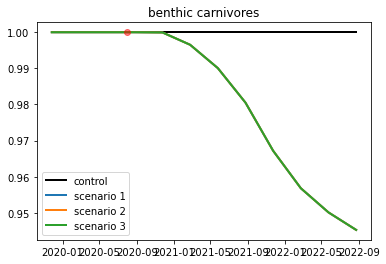

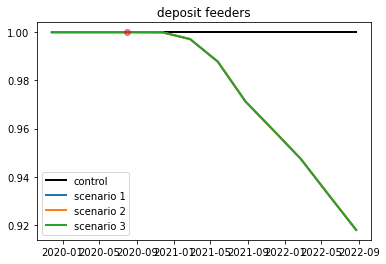

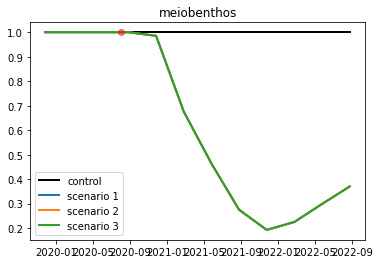

In [143]:
plot_pelagic_box(benth_feeders, scenario1, 5)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:title={'center':'sponges'}>)

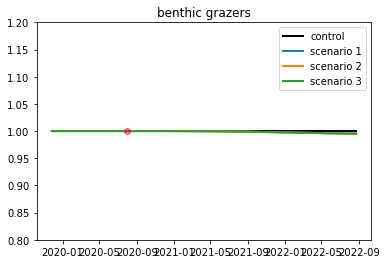

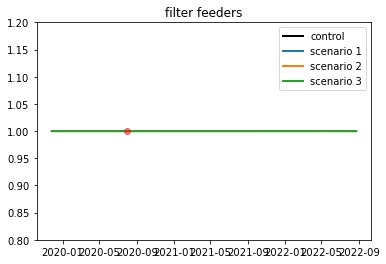

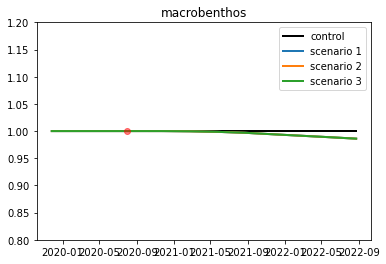

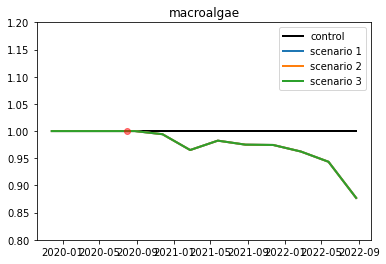

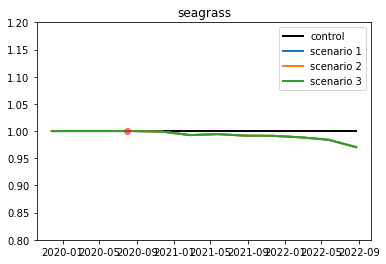

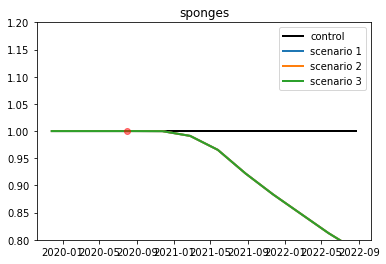

In [158]:
plot_benthic_box(benthos, scenario1, 5)

(<Figure size 432x288 with 1 Axes>,
 <AxesSubplot:title={'center':'dungeness crabs'}>)

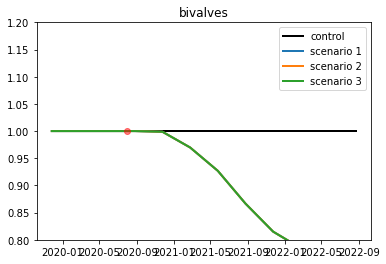

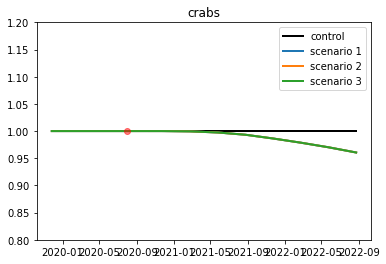

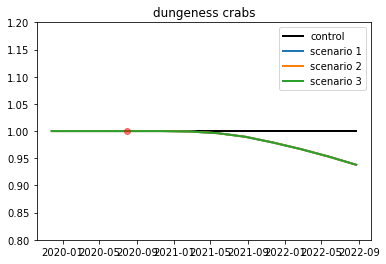

In [159]:
plot_benthic_box(shellfish, scenario1, 5)